# Access Distribution for Access Log
1. To analyze the AMZ Kaggle Access Distribution.
2. To extract weights from that access distrubution.
3. To assign the new weight to the syhtetuc access log.

In [16]:
### Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import igraph as ig
from itertools import product

fpath = Path(mpl.get_data_path(), "C:\\Users\\danie\\AppData\\Local\\Microsoft\\Windows\\Fonts\\mulish-regular.ttf")

## AMZ - Access Distribution Analysis

In [2]:
### Read data
filepath = "../../00-Data/train.csv"
df_amz = pd.read_csv(filepath)
df_amz_pos = df_amz[df_amz.ACTION==1]
print("|L+| =", len(df_amz_pos))

|L+| = 30872


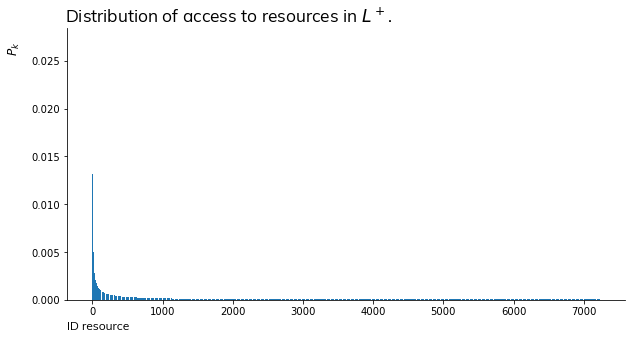

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.spines[['right', 'top']].set_visible(False)
access_distri = df_amz_pos.RID.value_counts(normalize=True)
ax.bar(range(len(access_distri)), access_distri)
#ax.plot(range(len(access_distri)-1), test[1:], ls="--")
ax.set_xlabel('ID resource', loc="left", size="large", font=fpath)
ax.set_ylabel('$P_k$', loc="top", size="large", font=fpath, parse_math=True)
ax.yaxis.set_label_coords(-0.08,0.95)
#ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0, y=1, alpha=0.5)
ax.set_title("Distribution of access to resources in $L^+$.", size="xx-large",  font=fpath, x=0.29, y=1, parse_math=True)
#plt.savefig("AMZ-AccDistri.svg")
plt.show()

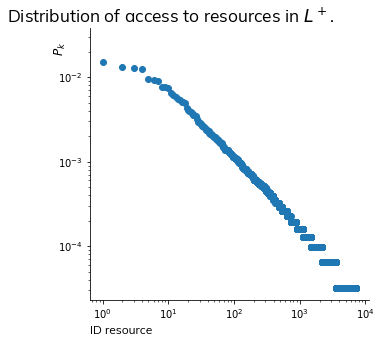

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
access_distri = df_amz_pos.RID.value_counts(normalize=True)
#ax.bar(range(len(access_distri)), access_distri)
ax.plot(range(len(access_distri)), access_distri, "o", ls='None')
ax.set_xlabel('ID resource', loc="left", size="large", font=fpath)
ax.set_ylabel('$P_k$', loc="top", size="large", font=fpath, parse_math=True)
ax.yaxis.set_label_coords(-0.08,0.95)
#ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0, y=1, alpha=0.5)
ax.set_title("Distribution of access to resources in $L^+$.", size="xx-large",  font=fpath, x=0.29, y=1, parse_math=True)
plt.show()

In [135]:
result = ig.power_law_fit(access_distri)
test = np.arange(len(access_distri))
test = test ** -result.alpha
test = test / zeta(result.alpha)
#test
print(result.summary())

Fitted power-law distribution on continuous data

Exponent (alpha)  = 2.319916
Cutoff (xmin)     = 0.001198

Log-likelihood    = 498.429924

H0: data was drawn from the fitted distribution

KS test statistic = 0.046437
p-value           = 0.986573

H0 could not be rejected at significance level 0.05


c:\Users\danie\anaconda3\envs\tesis_env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
test = np.arange(len(access_distri))
test = test ** -1.34

c:\Users\danie\anaconda3\envs\tesis_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


In [129]:
from scipy.special import zeta

In [132]:
test

array([           inf, 7.03240446e-01, 1.40844409e-01, ...,
       7.85604708e-10, 7.85352442e-10, 7.85100292e-10])

c:\Users\danie\anaconda3\envs\tesis_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


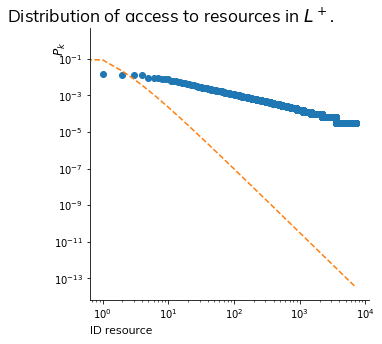

In [133]:
test = np.arange(len(access_distri))
test = test ** -3.5
fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
access_distri = df_amz_pos.RID.value_counts(normalize=True)
#ax.bar(range(len(access_distri)), access_distri)
ax.plot(range(len(access_distri)), access_distri, "o", ls='None')
ax.plot(range(len(access_distri)-1), test[1:], ls="--")
ax.set_xlabel('ID resource', loc="left", size="large", font=fpath)
ax.set_ylabel('$P_k$', loc="top", size="large", font=fpath, parse_math=True)
ax.yaxis.set_label_coords(-0.08,0.95)
#ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0, y=1, alpha=0.5)
ax.set_title("Distribution of access to resources in $L^+$.", size="xx-large",  font=fpath, x=0.29, y=1, parse_math=True)
plt.show()

In [3]:
def calculate_log_binning(degree_distribution, n_bins):
    """Compute the log-binning y-values in the degree distribution.

    Divides the degree distribution in `n_bins` segments.

    Parameters
    ----------
    degree_distribution: list
        Network degree distribution.
    n_bins:
        Number of bins to assign.

    Returns
    -------
    (list, list)
        The (x_values, y_values_log_bin_list) tuple.
    """
    current_sum = 0
    previous_k = 0
    y_values_log_bin_list = []
    x_values = []

    for i in range(1, n_bins):
        x_values.append(previous_k)
        current_k = 2 ** (i)
        current_sum = current_sum + current_k
        temp_y_value = sum(degree_distribution[previous_k:current_k])
        temp_y_value = temp_y_value / (current_k-previous_k)
        y_values_log_bin_list.append(temp_y_value)
        previous_k = current_k

        if current_sum > len(degree_distribution):
            x_values.append(previous_k)
            temp_y_value = sum(
                degree_distribution[previous_k:len(degree_distribution)])
            temp_y_value = temp_y_value / (len(degree_distribution)-previous_k)
            y_values_log_bin_list.append(temp_y_value)
            break

    return x_values, y_values_log_bin_list

In [134]:
zeta(result.alpha-2)/zeta(result.alpha)

-0.6644377092378018

In [33]:
from math import log2, ceil

In [139]:
access_distri = df_amz_pos.RID.value_counts(normalize=False)
access_distri_norm = df_amz_pos.RID.value_counts(normalize=True)

In [146]:
result = ig.power_law_fit(list(access_distri))
print(result.summary())
test = np.arange(len(access_distri))
test = test ** -result.alpha
print(test)
test = test / zeta(result.alpha)
print(test)

Fitted power-law distribution on continuous data

Exponent (alpha)  = 2.319916
Cutoff (xmin)     = 0.001198

Log-likelihood    = 498.429924

H0: data was drawn from the fitted distribution

KS test statistic = 0.046437
p-value           = 0.986573

H0 could not be rejected at significance level 0.05
[           inf 1.00000000e+00 2.00279165e-01 ... 1.11712105e-09
 1.11676233e-09 1.11640378e-09]
[           inf 7.03240446e-01 1.40844409e-01 ... 7.85604708e-10
 7.85352442e-10 7.85100292e-10]


c:\Users\danie\anaconda3\envs\tesis_env\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


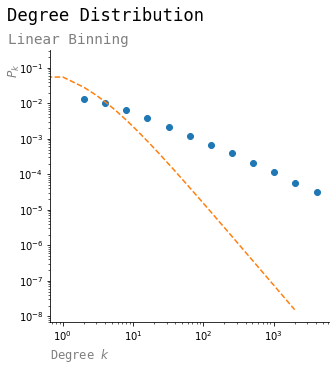

In [149]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
n_log_bin = ceil(log2(len(access_distri)))
x_values, y_values = calculate_log_binning(access_distri_norm, n_log_bin)
ax.plot(x_values, y_values, "o", ls='None')
#ax.plot(range(len(access_distri)), access_distri_norm, "o", ls='None')
#ax.plot(range(len(access_distri)-1), test[1:2208], ls="--")
ax.plot(range(1998), test[2:2000], ls="--")
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Degree Distribution", size="xx-large", family='monospace', x=0.28, y=1)
plt.show()

In [145]:
test

array([           inf, 6.61792934e-01, 1.47201875e-01, ...,
       2.83641297e-09, 2.83556157e-09, 2.83471055e-09])

In [102]:
test2 = list(np.zeros(10))
test2 = test2+ list(test[10:2208])
test2

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0067829116455899304,
 0.005516360649930848,
 0.004567778009330384,
 0.003839904712708873,
 0.0032698306712073033,
 0.002815447939539636,
 0.0024477376281935863,
 0.0021461909198560833,
 0.0018959912581207137,
 0.0016862253172990668,
 0.0015087155828839257,
 0.0013572398561139494,
 0.0012269980368636408,
 0.0011142407060380894,
 0.001016005842610662,
 0.0009299292063899106,
 0.0008541057851785475,
 0.0007869872054918767,
 0.0007273048426408045,
 0.0006740115427123633,
 0.000626236991004245,
 0.0005832532012013989,
 0.0005444475905665167,
 0.0005093017976952379,
 0.00047737488763193836,
 0.0004482899380065176,
 0.0004217232518424811,
 0.00039739562656062157,
 0.00037506524415905636,
 0.0003545218482380337,
 0.00033558194901694223,
 0.0003180848545264174,
 0.0003018893695838727,
 0.00028687103746128636,
 0.000272919824864261,
 0.000259938170819717,
 0.0002478393356894516,
 0.00023654599881054982,
 0.00022598906297776212,
 0.00

In [100]:
10**1

10

# New

In [13]:
###
### Policy
# 0 = attribute = value
# 1 = attribute = attribute => attribute.value = attribute.value
policy_hc = [
    [
        [0, "position", "nurse"],
        [0, "type", "HR"],
        [1, "uward", "rward"]
    ],
    [
        [0, "type", "HR"],
        [1, "tratingTeam", "teams"]
    ],
    [
        [0, "type", "HR"],
        [1, "uname", "patient"]
    ],
    [
        [0, "type", "HR"],
        [1, "patient", "agentfor"]
    ],

    [
        [0, "type", "HRItem"],
        [1, "uname", "author"]
    ],
    [
        [0, "position", "nurse"],
        [0, "type", "HRItem"],
        [0, "topics", "nursing"],
        [1, "uward", "rward"]
    ],
    [
        [0, "type", "HRItem"],
        [1, "topics", "specialties"],
        [1, "tratingTeam", "teams"]
    ],
    [
        [0, "type", "HRItem"],
        [0, "topics", "note"],
        [1, "uname", "patient"]
    ],
    [
        [0, "type", "HRItem"],
        [0, "topics", "note"],
        [1, "patient", "agentfor"]
    ]
]

# Policy summary
counter_len = 0
for rule in policy_hc:
    counter_len += len(rule)
print("|R|", len(policy_hc))
print("avg(R)", counter_len/len(policy_hc))
print("WSC", counter_len)


class AccessLog:
    """ All operation in AccessLog (AL) """
    def __init__(self, df_users, df_rscs) -> None:
        """ Initialize AL attributes """
        self.df_users = df_users
        self.df_rscs = df_rscs
        self.user_attrs = df_users.columns
        self.rsrc_attrs = df_rscs.columns
        self.universal_access_log = []
    
    def compute_universal_al(self) -> None:
        """ Compute the universal Access Log (UAL). |UAL| = |U| x |R|"""
        access_log = []
        for user in self.df_users.values:
            for res in self.df_rscs.values:        
                access_log.append(list(user) + list(res))
        
        access_log = pd.DataFrame(access_log)
        access_log.columns = self.df_users.columns.append(self.df_rscs.columns)
        self.universal_access_log = access_log

    def policy_evaluation(self, policy) -> None:
        """ Compare each access record with a policy set."""
        false_negs = [] # False negatives
        true_pos = [] # True positives
        len_policy = len(policy)

        for acc_req in self.universal_access_log.iloc:
            denies_count = 0
            for rule in policy:
                res = True
                for item_rule in rule:
                    if item_rule[0] == 0:
                        if acc_req[item_rule[1]] != item_rule[2]:
                            res = False
                            break
                    if item_rule[0] == 1: # => attr1.val = attr2.val
                        if acc_req[item_rule[1]] != acc_req[item_rule[2]]:
                            res = False
                            break

                if res == False:
                    denies_count += 1
            if denies_count == len_policy:
                false_negs.append(acc_req)
            else:
                true_pos.append(acc_req)
        
        false_negs = pd.DataFrame(false_negs)
        true_pos = pd.DataFrame(true_pos)

        print("FN;", len(false_negs), "\t\tTP:", len(true_pos))

        # Add "ACTION" column
        false_negs["ACTION"] = 0
        true_pos["ACTION"] = 1

        # Access log with "ACTION" column
        self.universal_access_log = pd.concat([true_pos,false_negs])

    def get_sparse_al(self, fraction, random_state=None, previous_al=None):        
        """ Compute the sparse access log (SAL) version. """
        acc_log = self.universal_access_log
        if isinstance(previous_al, pd.DataFrame):
            acc_log = previous_al
        sparse_positive_al = None   
        pos_access_req = acc_log[acc_log["ACTION"]==1]
        if random_state != None:
            sparse_positive_al = pos_access_req.sample(frac=fraction,
                                                       random_state=random_state)
        else:
            sparse_positive_al = pos_access_req.sample(frac=fraction)

        return pd.concat([sparse_positive_al, acc_log[acc_log["ACTION"]==0]])

    def get_noisy_al(self, fraction, random_state=None, previous_al=None):
        """ Compute the noisy access log (NAL) version. """
        acc_log = self.universal_access_log
        if isinstance(previous_al, pd.DataFrame):
            acc_log = previous_al

        noysi_al = None
        if random_state != None:
            noisy_separation = StratifiedShuffleSplit(n_splits = 1,
                                                      train_size = fraction,
                                                      random_state = random_state)
        else:
            noisy_separation = StratifiedShuffleSplit(n_splits = 1,
                                                      train_size = fraction)
        
        noisy_acc_log_selection = noisy_separation.split(acc_log, acc_log.ACTION)
                        
        noisy_acc_req = None
        normal_acc_req = None
        for noisy_idx, normal_idx, in noisy_acc_log_selection:
            noisy_acc_req = acc_log.iloc[noisy_idx]
            normal_acc_req = acc_log.iloc[normal_idx]

        # Change the resolution in the noisy_selection dataset
        noisy_acc_req["ACTION"] = np.where(noisy_acc_req["ACTION"] == 0, 1, 0)

        noysi_al = pd.concat([noisy_acc_req, normal_acc_req])

        return noysi_al

    def get_balanced_al(self, positive_frac, random_state = None, previous_al = None):
        acc_log = self.universal_access_log
        
        if isinstance(previous_al, pd.DataFrame):
            acc_log = previous_al        

        # Compute the original balanced
        pos_acc_log = acc_log[acc_log["ACTION"]==1]
        neg_acc_log = acc_log[acc_log["ACTION"]==0]

        len_al = len(acc_log)
        len_pos_ar = len(pos_acc_log)

        limit_positive_frac = ( len_pos_ar * 100 ) / len_al

        if positive_frac < limit_positive_frac and positive_frac > 1:
            print("Is not possible")
            return
        
        len_neg_ar = int(( (1-positive_frac) * 100 * len_pos_ar ) / (positive_frac*100))        

        neg_acc_req = []
        if random_state != None:
            neg_acc_req = neg_acc_log.sample(n=len_neg_ar,
                                             random_state=random_state)
        else:
            neg_acc_req = neg_acc_log.sample(n=len_neg_ar)

        return pd.concat([pos_acc_log, neg_acc_req])

        


|R| 9
avg(R) 2.6666666666666665
WSC 24


In [14]:
### Load data

# Load users
filepath = "../data/test.log"
df_users = pd.read_csv(filepath)
#df_users = df_users[df_users.columns[1:]] # remove the rname column
df_users = df_users.drop_duplicates() # Remove deplicated users
print("###*** DF - USERS - DONE!***###")

# Load resources
filepath = "../data/HC-res.csv"
df_res = pd.read_csv(filepath)
df_res = df_res[df_res.columns[1:]] # Remove the ID
df_res = df_res.drop_duplicates() # Remove deplicated resources
print("###*** DF - RESOURCES - DONE!***###")

###*** DF - USERS - DONE!***###
###*** DF - RESOURCES - DONE!***###


In [17]:
### Preprocessing in resources 

# All possible combination
uniques = [df_res[i].unique().tolist() for i in df_res.columns]
df_res = pd.DataFrame(product(*uniques), columns = df_res.columns)
df_res["rname"] = df_res.index
print("Done")

Done


In [18]:
#### Access Log object

hc_acc_log = AccessLog(df_users=df_users, df_rscs=df_res)

# Compute access log universal
hc_acc_log.compute_universal_al()

# Compute the decision for each access requests
hc_acc_log.policy_evaluation(policy_hc)

FN; 133920 		TP: 19840


In [26]:
pos_hc_acc_log = hc_acc_log.universal_access_log[hc_acc_log.universal_access_log.ACTION==1] # Accesos positivos
all_resources = pos_hc_acc_log.rname.unique()

In [88]:
n_log_bin = len(all_resources)
access_distri_norm = df_amz_pos.RID.value_counts(normalize=False)
access_distri_norm
#x_values, y_values = calculate_log_binning(access_distri_norm, n_log_bin)

4675      836
79092     468
75078     405
3853      398
25993     390
         ... 
29265       1
87823       1
112392      1
34080       1
32147       1
Name: RID, Length: 7226, dtype: int64

In [48]:
len(all_resources)

2480

In [45]:
len(y_values)

13

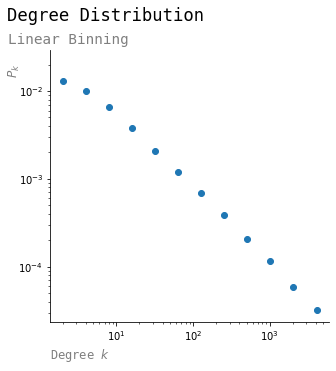

In [47]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
#n_log_bin = ceil(log2(len(access_distri_norm)))
#x_values, y_values = calculate_log_binning(access_distri_norm, n_log_bin)
ax.plot(x_values, y_values, "o", ls='None')
#ax.plot(range(len(access_distri)), access_distri_norm, "o", ls='None')
#ax.plot(range(len(access_distri)-1), test[1:2208], ls="--")
#ax.plot(range(, test[2:2000], ls="--")
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Degree Distribution", size="xx-large", family='monospace', x=0.28, y=1)
plt.show()

In [91]:
access_distri_norm

4675      836
79092     468
75078     405
3853      398
25993     390
         ... 
29265       1
87823       1
112392      1
34080       1
32147       1
Name: RID, Length: 7226, dtype: int64

In [92]:
dict_res = dict(zip(all_resources, access_distri_norm[:len(all_resources)]))
dict_res

{2480: 836,
 2482: 468,
 2484: 405,
 2486: 398,
 2488: 390,
 2490: 294,
 2492: 283,
 2494: 279,
 2496: 237,
 2498: 236,
 2500: 231,
 2502: 198,
 2504: 192,
 2506: 181,
 2508: 169,
 2510: 164,
 2512: 155,
 2514: 155,
 2516: 153,
 2518: 134,
 2520: 127,
 2522: 124,
 2524: 119,
 2526: 115,
 2528: 111,
 2530: 109,
 2532: 107,
 2534: 99,
 2536: 90,
 2538: 90,
 2540: 88,
 2542: 86,
 2544: 86,
 2546: 82,
 2548: 81,
 2550: 80,
 2552: 78,
 2554: 75,
 2556: 74,
 2558: 74,
 2560: 72,
 2562: 72,
 2564: 68,
 2566: 66,
 2568: 66,
 2570: 65,
 2572: 63,
 2574: 63,
 2576: 62,
 2578: 61,
 2580: 61,
 2582: 60,
 2584: 60,
 2586: 59,
 2588: 57,
 2590: 57,
 2592: 56,
 2594: 55,
 2596: 55,
 2598: 54,
 2600: 53,
 2602: 53,
 2604: 52,
 2606: 51,
 2608: 51,
 2610: 51,
 2612: 49,
 2614: 47,
 2616: 46,
 2618: 46,
 2620: 46,
 2622: 45,
 2624: 44,
 2626: 43,
 2628: 43,
 2630: 43,
 2632: 43,
 2634: 43,
 2636: 43,
 2638: 42,
 2640: 42,
 2642: 42,
 2644: 41,
 2646: 40,
 2648: 40,
 2650: 40,
 2652: 39,
 2654: 39,
 2656

In [100]:
len(dict_res)

2480

In [93]:
pos_hc_acc_log["weight"] = pos_hc_acc_log["rname"].map(dict_res)
pos_hc_acc_log

c:\Users\danie\anaconda3\envs\tesis_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,uname,position,uward,specialties,teams,agentfor,type,author,patient,topics,tratingTeam,rward,rname,ACTION,weight,freq
2480,oncNurse1,nurse,oncward,None,None,None,HR,oncNurse1,oncPat1,oncology,oncTeam1,oncward,2480,1,836,164.0
2482,oncNurse1,nurse,oncward,None,None,None,HR,oncNurse1,oncPat1,oncology,oncTeam2,oncward,2482,1,468,1.0
2484,oncNurse1,nurse,oncward,None,None,None,HR,oncNurse1,oncPat1,oncology,carTeam1,oncward,2484,1,405,17.0
2486,oncNurse1,nurse,oncward,None,None,None,HR,oncNurse1,oncPat1,oncology,carTeam2,oncward,2486,1,398,NaN
2488,oncNurse1,nurse,oncward,None,None,None,HR,oncNurse1,oncPat1,nursing,oncTeam1,oncward,2488,1,390,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153755,carAgent1,None,None,None,None,carPat1,HR,carAgent1,carPat1,cardiology,oncTeam2,carward,4955,1,2,NaN
153756,carAgent1,None,None,None,None,carPat1,HR,carAgent1,carPat1,cardiology,carTeam1,oncward,4956,1,4,NaN
153757,carAgent1,None,None,None,None,carPat1,HR,carAgent1,carPat1,cardiology,carTeam1,carward,4957,1,2,NaN
153758,carAgent1,None,None,None,None,carPat1,HR,carAgent1,carPat1,cardiology,carTeam2,oncward,4958,1,4,NaN


In [99]:
len(pos_hc_acc_log.rname.unique())

2480

In [83]:
pos_hc_acc_log['freq'] = df_amz_pos.groupby('RID')['RID'].transform('count')
sparse_test = pos_hc_acc_log.sample(weights = pos_hc_acc_log.freq)
sparse_test

c:\Users\danie\anaconda3\envs\tesis_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,uname,position,uward,specialties,teams,agentfor,type,author,patient,topics,tratingTeam,rward,rname,ACTION,weight,freq
7617,carNurse1,nurse,carward,None,None,None,HR,doc1,oncPat1,note,oncTeam1,carward,2657,1,0.00013,390.0


In [81]:
sparse_test

,uname,position,uward,specialties,teams,agentfor,type,author,patient,topics,tratingTeam,rward,rname,ACTION,weight
153667,carAgent1,None,None,None,None,carPat1,HR,oncAgent1,carPat1,none,oncTeam2,carward,4867,1,0.000065


In [101]:
sparse_test = pos_hc_acc_log.sample(frac=0.95, weights="weight")
sparse_test

,uname,position,uward,specialties,teams,agentfor,type,author,patient,topics,tratingTeam,rward,rname,ACTION,weight,freq
113729,doc21,doctor,None,neurology,oncTeam1,None,HR,doc25,carPat1,nursing,oncTeam1,carward,4609,1,2,NaN
146338,oncAgent1,None,None,None,None,oncPat1,HR,oncNurse1,oncPat1,note,oncTeam2,oncward,2498,1,236,NaN
146664,oncAgent1,None,None,None,None,oncPat1,HR,doc3,oncPat1,none,oncTeam1,oncward,2824,1,22,NaN
136428,oncPat1,None,oncward,None,None,None,HR,oncNurse1,oncPat1,none,carTeam1,oncward,2508,1,169,NaN
126494,doc24,doctor,None,neurology,carTeam2,None,HR,oncNurse1,oncPat1,nursing,carTeam2,oncward,2494,1,279,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9857,carNurse1,nurse,carward,None,None,None,HR,carAgent1,oncPat1,note,oncTeam1,carward,4897,1,2,74.0
138669,oncPat1,None,oncward,None,None,None,HR,carPat1,oncPat1,none,carTeam1,carward,4749,1,2,NaN
28655,doc4,doctor,None,oncology,carTeam2,None,HR,doc16,oncPat1,nursing,carTeam2,carward,3855,1,3,19.0
137689,oncPat1,None,oncward,None,None,None,HR,doc15,oncPat1,nursing,oncTeam1,carward,3769,1,3,NaN


In [102]:
sparse_test.rname.value_counts(normalize=False)

3371    8
4936    8
3669    8
4570    8
3111    8
       ..
4661    4
3985    4
3635    3
4927    3
4513    3
Name: rname, Length: 2480, dtype: int64

In [107]:
sparse_test[sparse_test.rname==4927]["weight"]

128927    2
9887      2
153727    2
Name: weight, dtype: int64

In [104]:
sparse_test[sparse_test.rname==4513]

,uname,position,uward,specialties,teams,agentfor,type,author,patient,topics,tratingTeam,rward,rname,ACTION,weight,freq
138433,oncPat1,None,oncward,None,None,None,HR,doc24,oncPat1,cardiology,oncTeam1,carward,4513,1,2,NaN
9473,carNurse1,nurse,carward,None,None,None,HR,doc24,oncPat1,cardiology,oncTeam1,carward,4513,1,2,4.0
148353,oncAgent1,None,None,None,None,oncPat1,HR,doc24,oncPat1,cardiology,oncTeam1,carward,4513,1,2,NaN


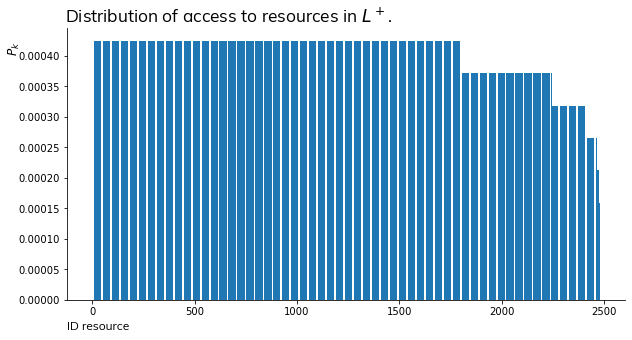

In [97]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.spines[['right', 'top']].set_visible(False)
access_distri = sparse_test.rname.value_counts(normalize=True)
ax.bar(range(len(access_distri)), access_distri)
ax.set_xlabel('ID resource', loc="left", size="large", font=fpath)
ax.set_ylabel('$P_k$', loc="top", size="large", font=fpath, parse_math=True)
ax.yaxis.set_label_coords(-0.08,0.95)
#ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0, y=1, alpha=0.5)
ax.set_title("Distribution of access to resources in $L^+$.", size="xx-large",  font=fpath, x=0.29, y=1, parse_math=True)
#plt.savefig("AMZ-AccDistri.svg")
plt.show()